In [69]:
import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

import seaborn as sns

from scipy import stats




df=pd.read_csv('/Users/suna/Desktop/coding/studentperformance/StudentPerformanceFactors.csv')

df.head()

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Yes                  0           Low          Medium   
1             Yes                  2        Medium          Medium   
2             Yes                  2        Medium          Medium   
3             Yes                  1        Medium          Medium   
4             Yes                  3        Medium            High   

  School_Type Peer_Influence  Physical_Activity Learning_Disabilities  \
0      Public       Positive                  3                    No   
1      Public       Negative                  4                    No   
2      Public        Neutral                  4                    No   
3      Public       Negative                  4                    No   
4      Public        Neutral                  4                    No   

  Parental_Education_Level Distance_from_Home  Gender  Exam_Score  
0              High School               Near    Male          67  
1                  College           Moderate  Female          61  
2             Postgraduate               Near    Male          74  
3              High School           Moderate    Male          71  
4                  College               Near  Female          70

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [3]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [16]:
df_na = df.dropna()
df_na.describe()

Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6378.000000  6378.000000  6378.000000      6378.000000   
mean       19.977109    80.020853     7.034964        75.066165   
std         5.985460    11.550723     1.468033        14.400389   
min         1.000000    60.000000     4.000000        50.000000   
25%        16.000000    70.000000     6.000000        63.000000   
50%        20.000000    80.000000     7.000000        75.000000   
75%        24.000000    90.000000     8.000000        88.000000   
max        44.000000   100.000000    10.000000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6378.000000        6378.000000  6378.000000  
mean            1.495296           2.972719    67.252117  
std             1.233984           1.028926     3.914217  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.000000    67.000000  
75%             2.000000           4.000000    69.000000  
max             8.000000           6.000000   101.000000

In [53]:
df = df.drop_duplicates()
print(f"\nData Shape after removing duplicates: {df.shape}")


Data Shape after removing duplicates: (6607, 20)


In [28]:
df.fillna({
    'Teacher_Quality': df['Teacher_Quality'].mode()[0],
    'Parental_Education_Level': df['Parental_Education_Level'].mode()[0],
    'Distance_from_Home': df['Distance_from_Home'].mode()[0]
}, inplace=True)


In [30]:
null_count = df.isnull().sum()
print(null_count)

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


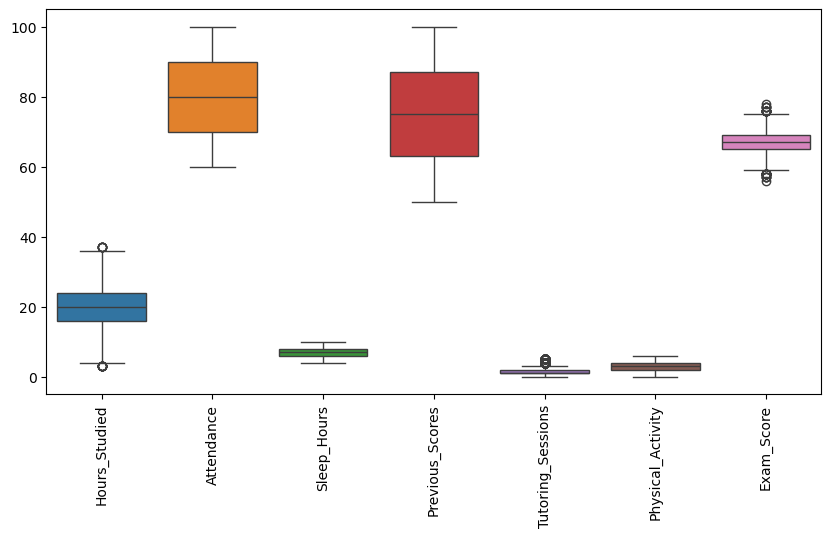

In [71]:
# 📌 Z-Score ile Aykırı Değerleri Bul ve Temizle

z_scores = np.abs(stats.zscore(df.select_dtypes(include=['number'])))

df = df[(z_scores < 3).all(axis=1)]  # Z-score'u 3'ten büyük olanları temizle



# 📌 Boxplot ile Aykırı Değerleri Görselleştirme

plt.figure(figsize=(10, 5))

sns.boxplot(data=df)

plt.xticks(rotation=90)

plt.show()

In [81]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

df_categorical_cols =df[categorical_cols]
df_numerical_cols =df[numerical_cols]

print(numerical_cols)
print(categorical_cols)

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')
Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')


In [93]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 
                       'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 
                       'School_Type', 'Peer_Influence', 'Learning_Disabilities', 
                       'Parental_Education_Level', 'Distance_from_Home', 'Gender']

label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le



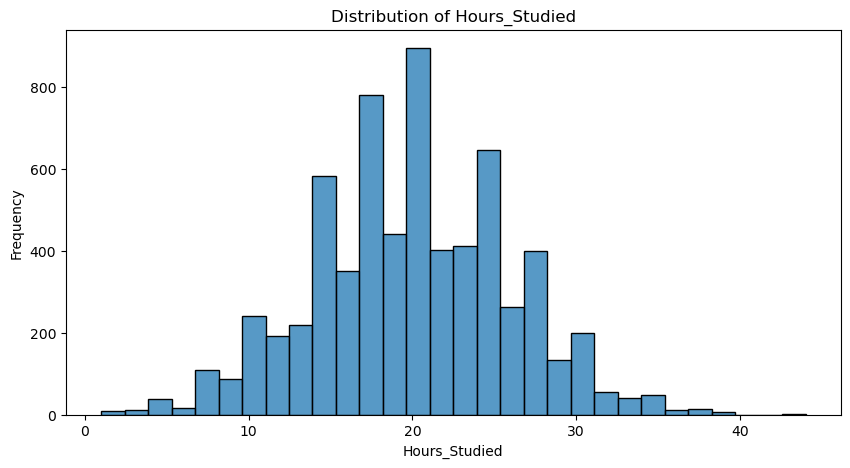

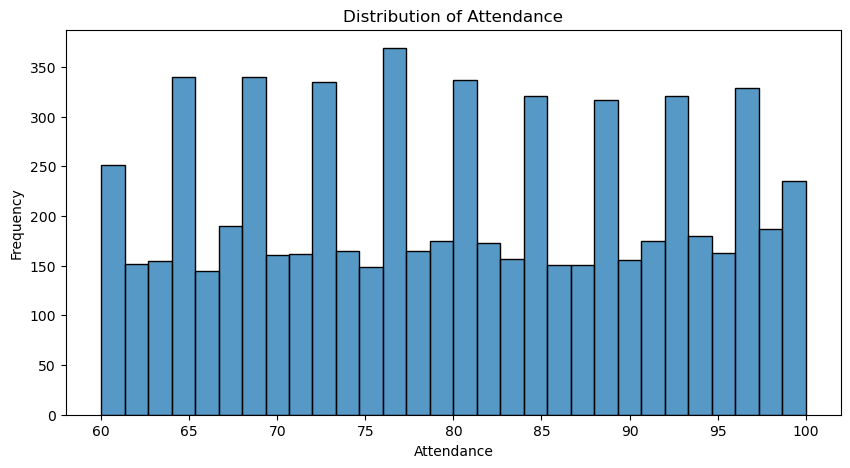

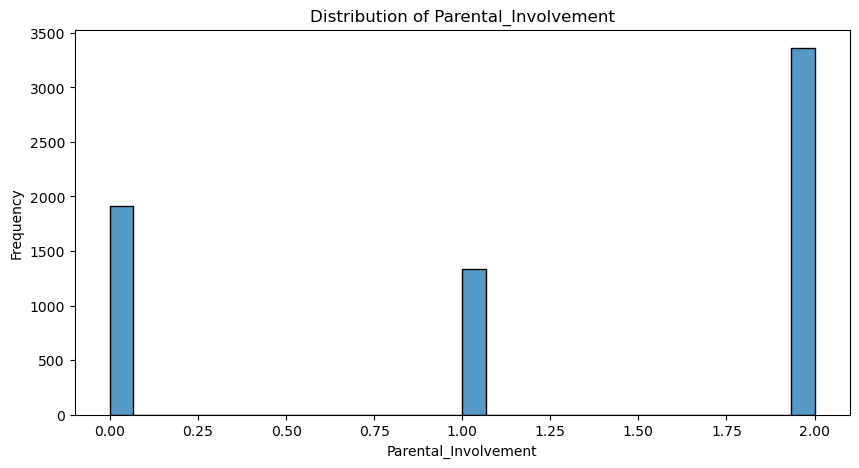

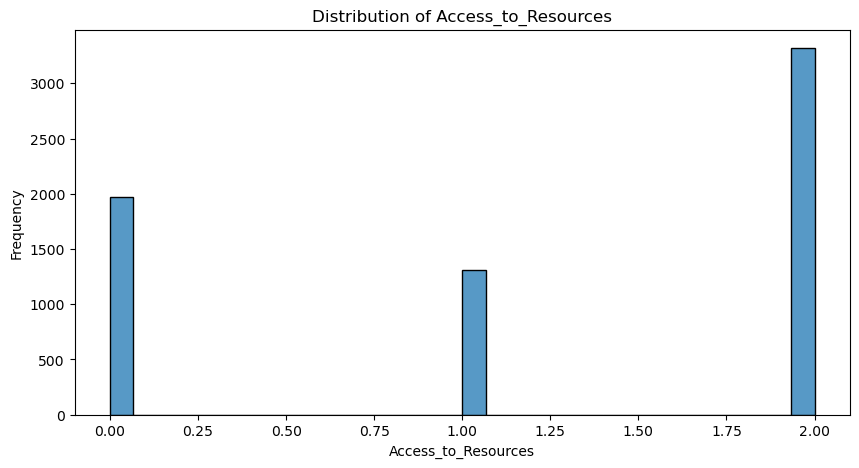

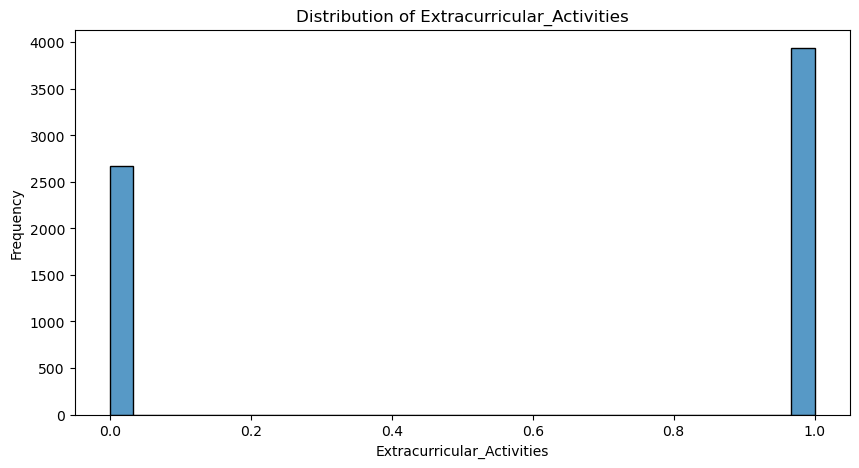

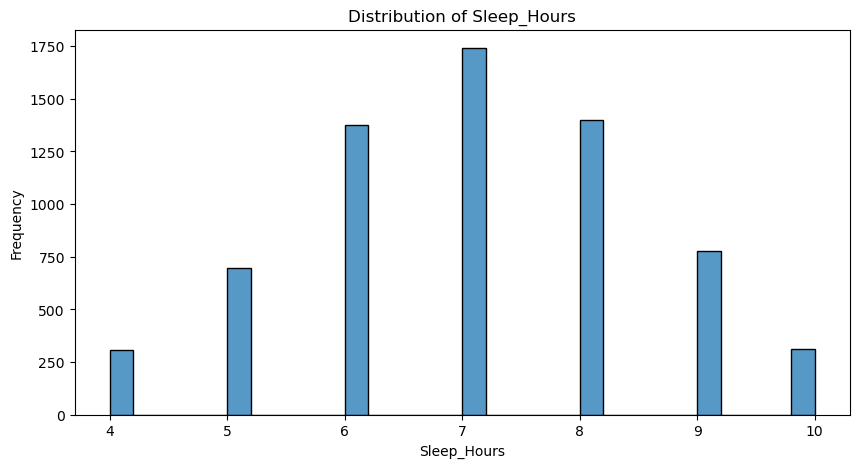

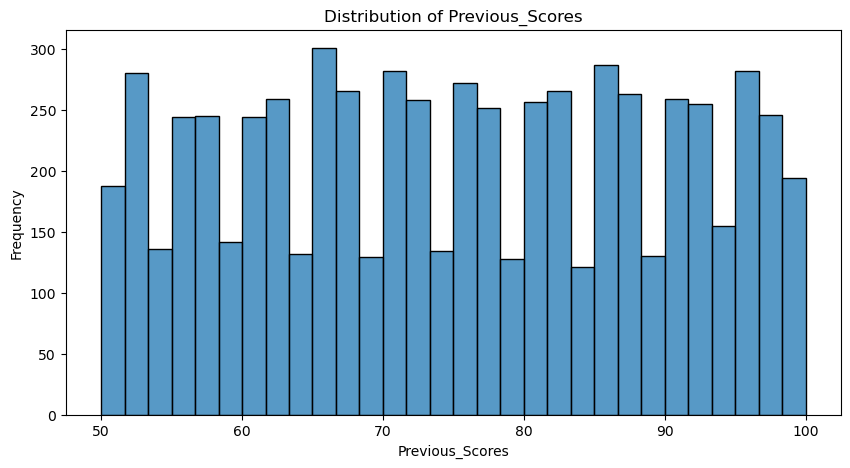

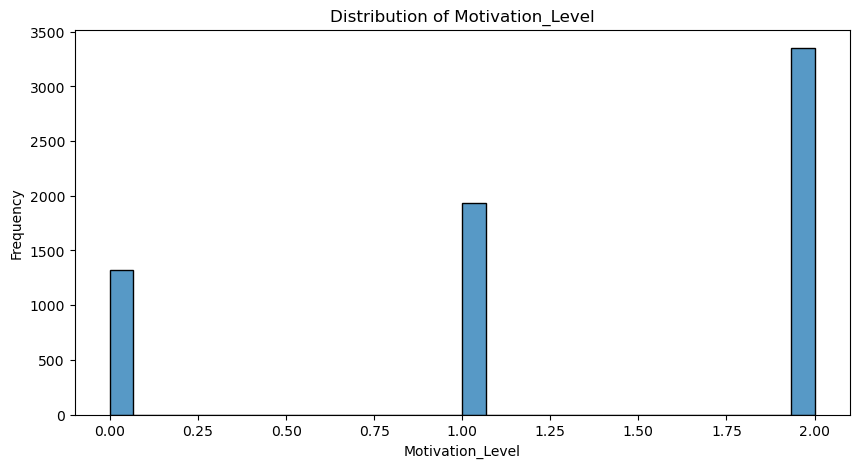

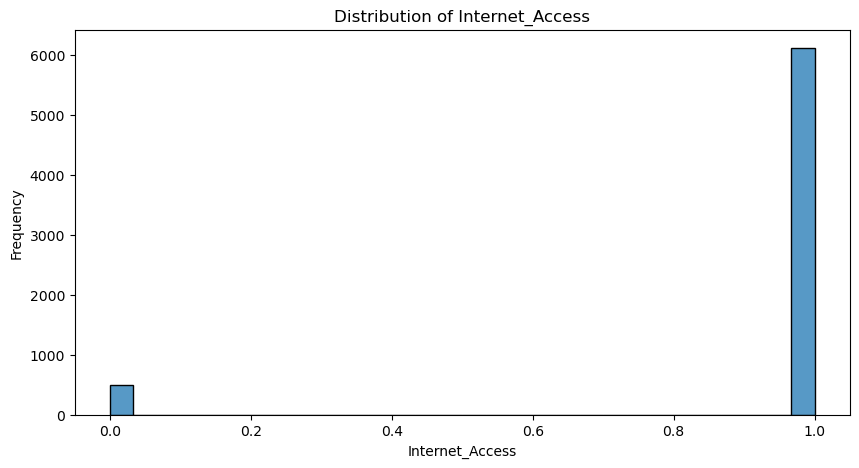

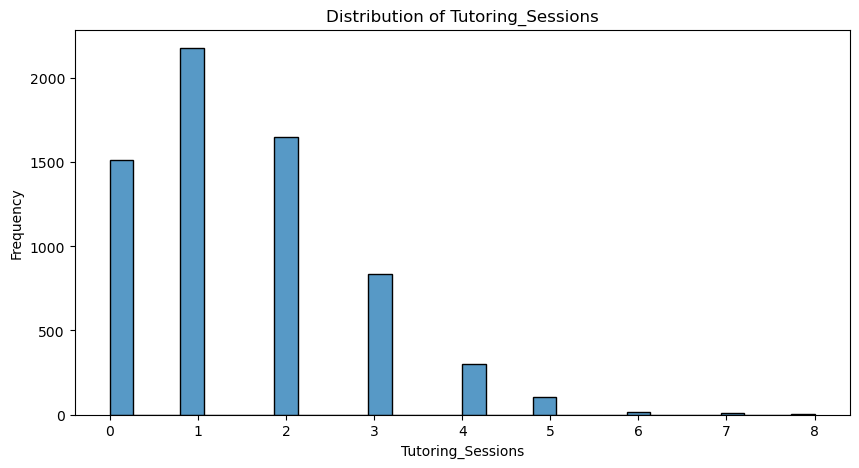

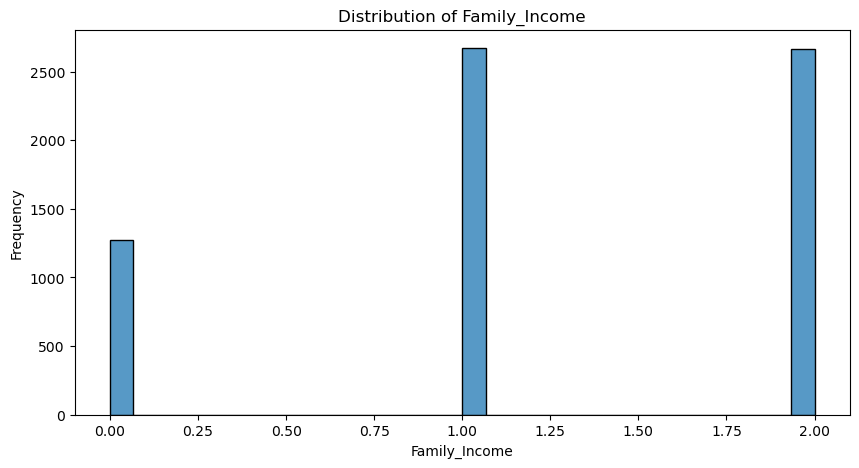

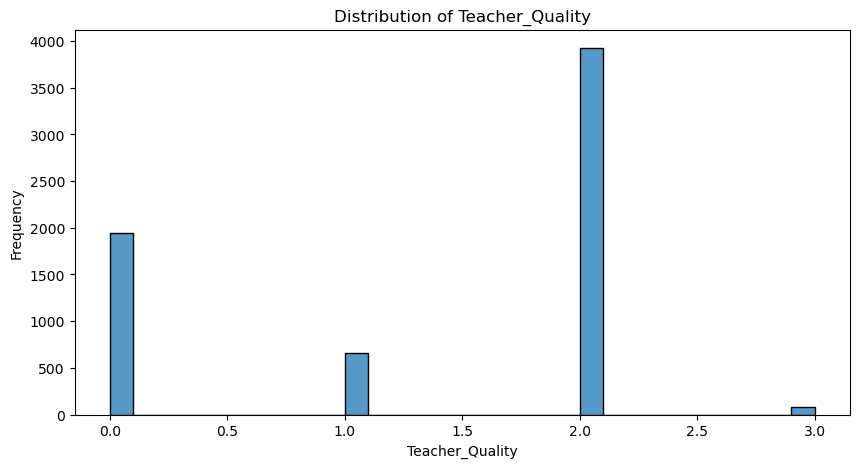

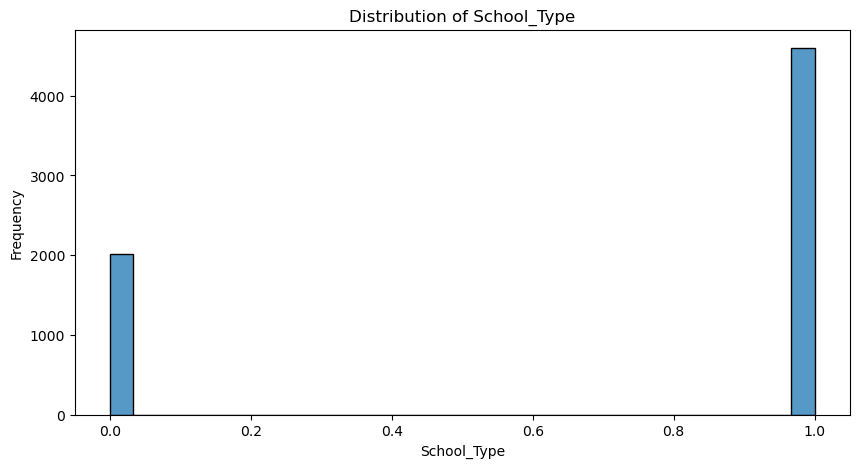

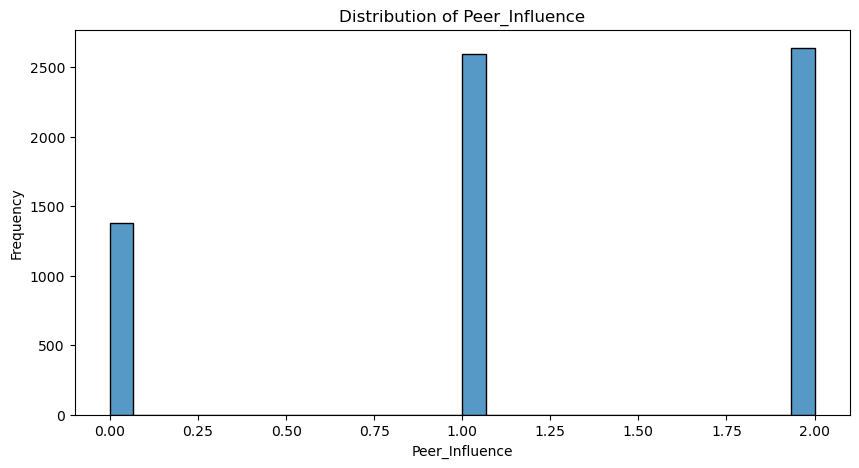

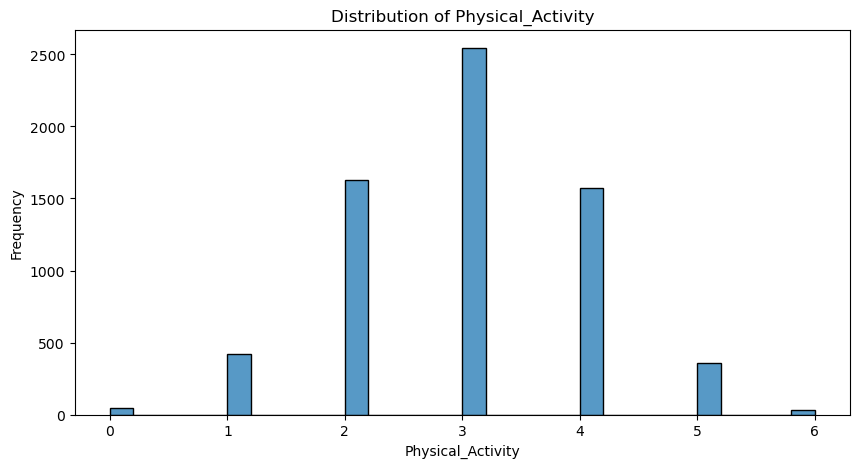

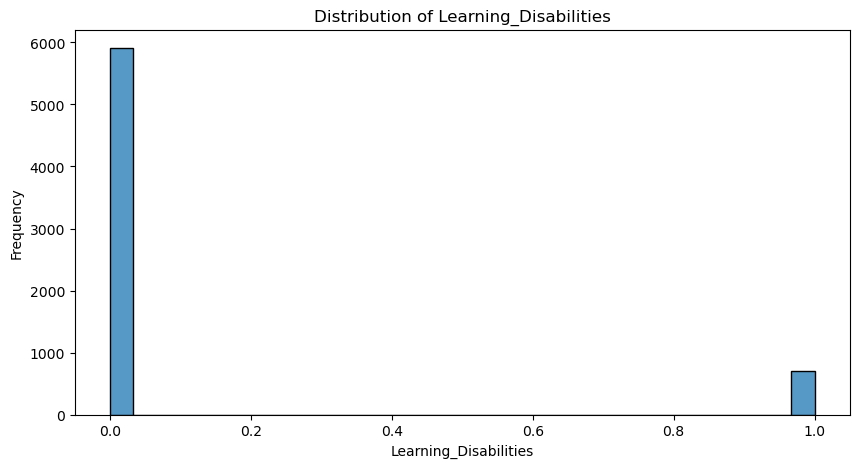

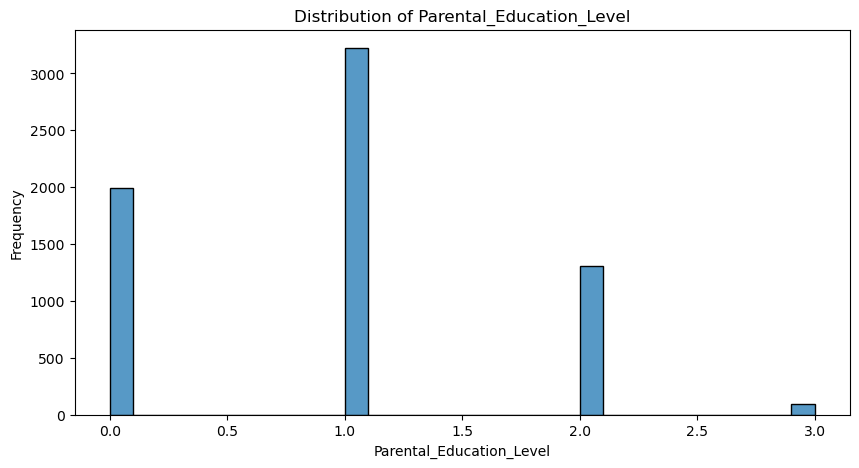

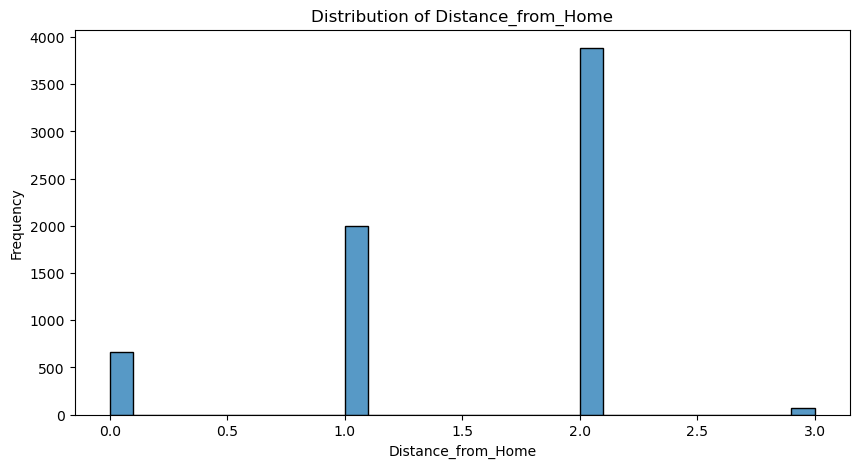

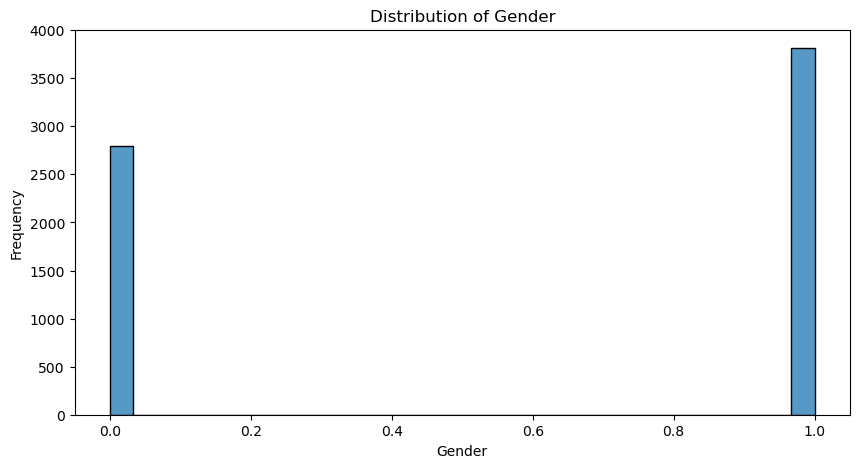

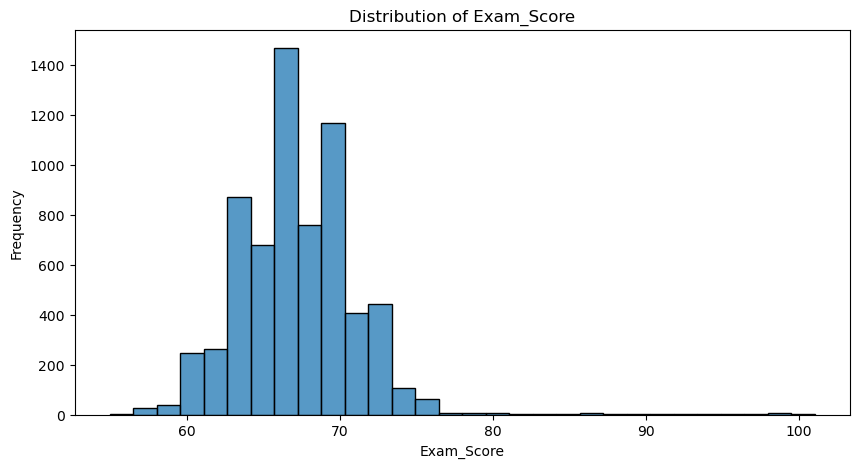

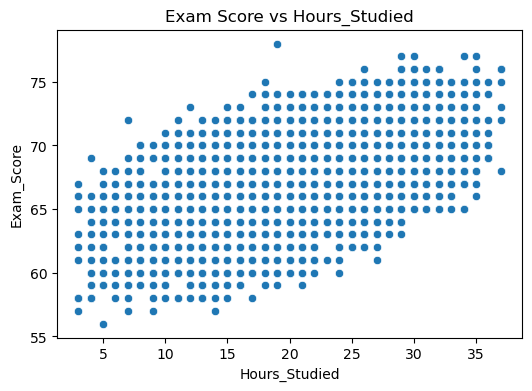

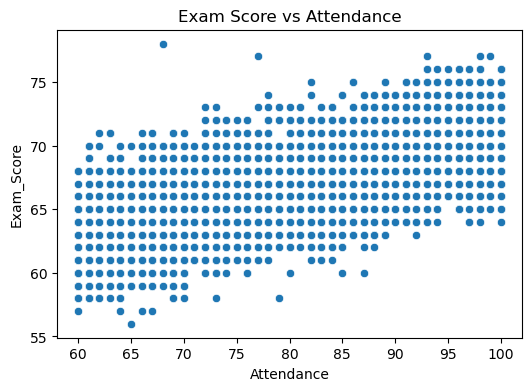

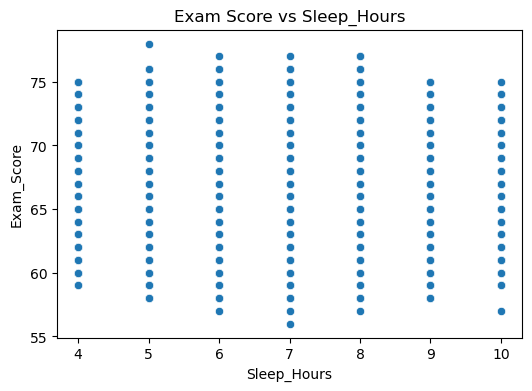

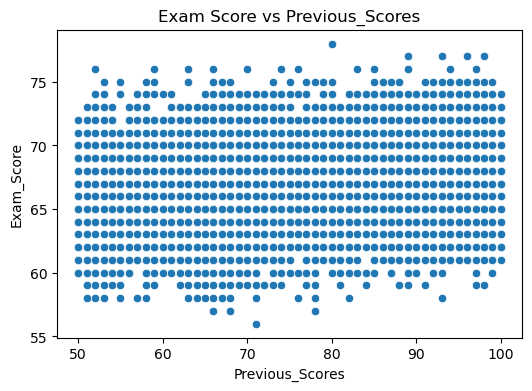

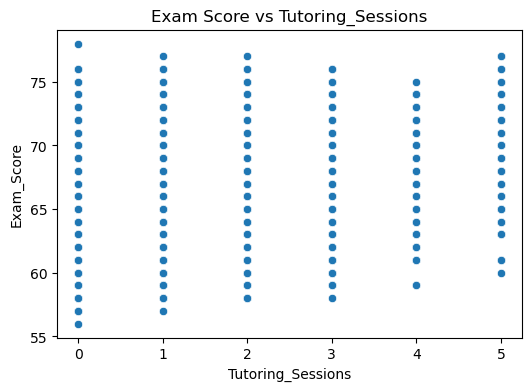

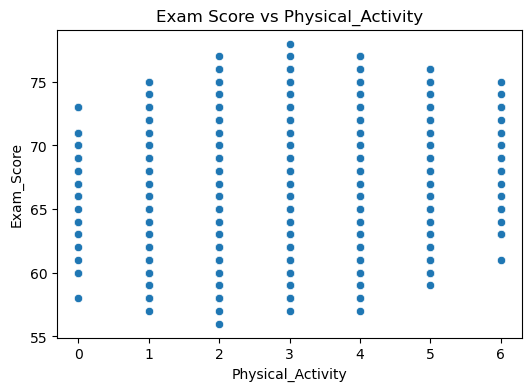

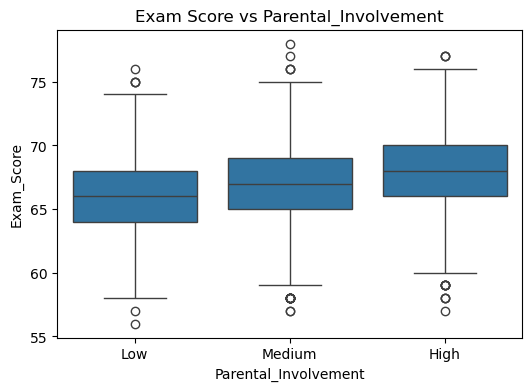

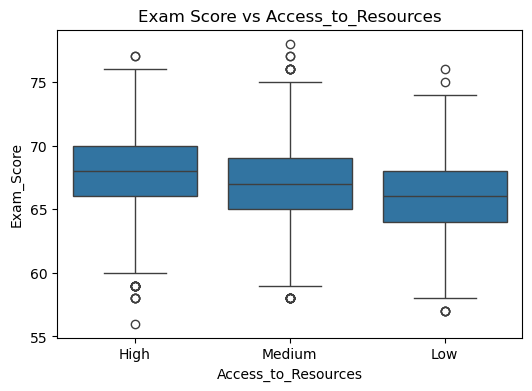

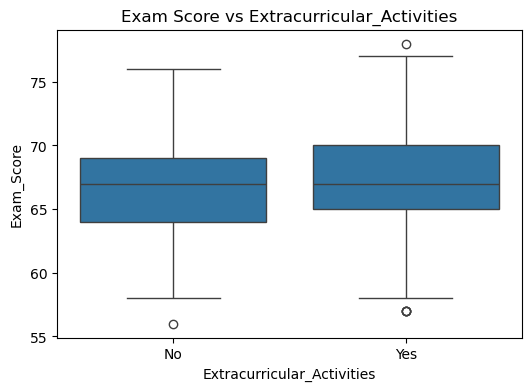

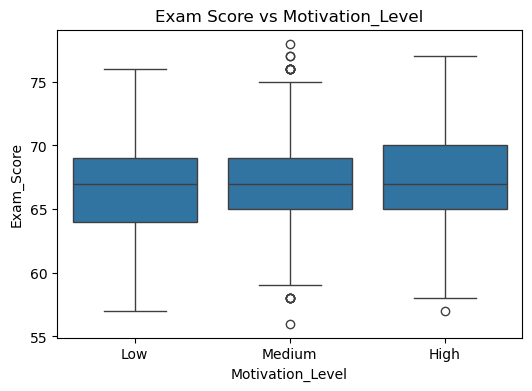

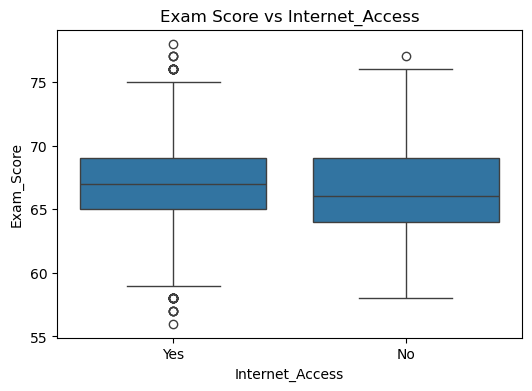

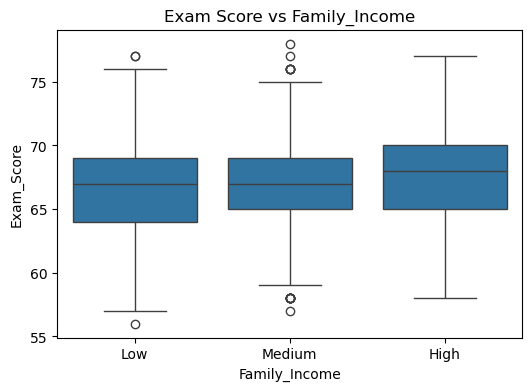

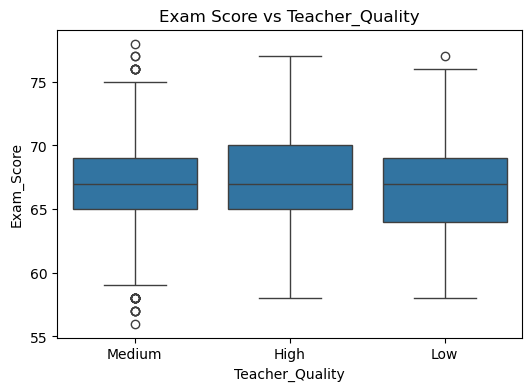

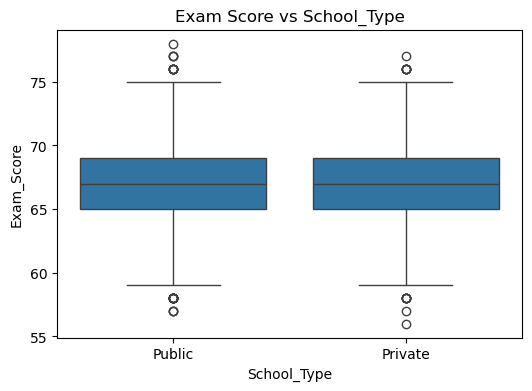

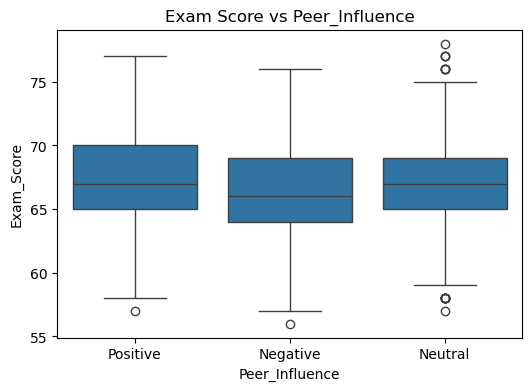

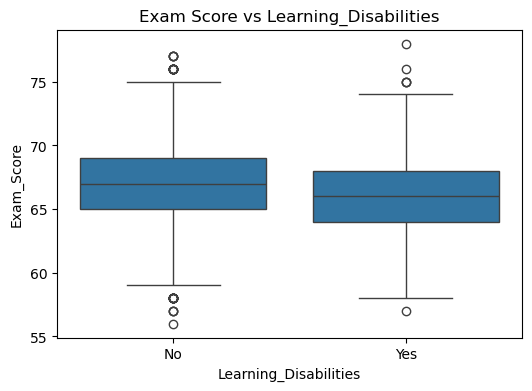

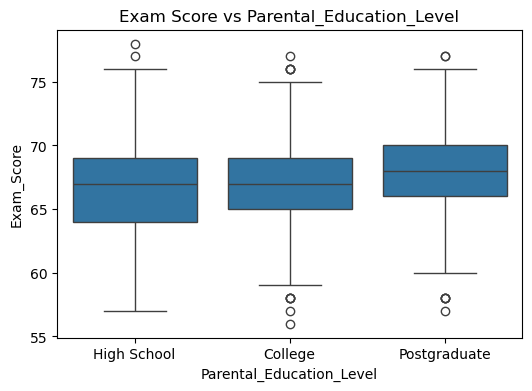

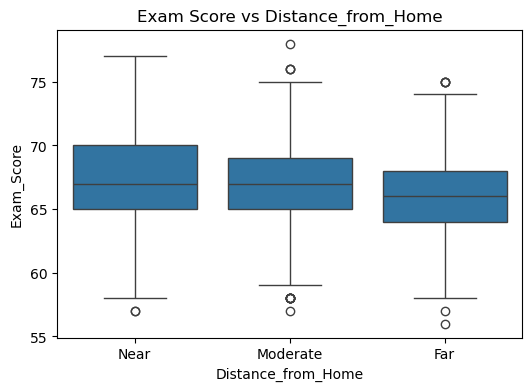

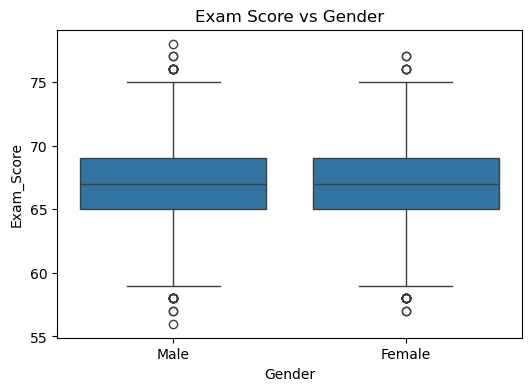

In [77]:
def plot_exam_score_vs_others(df, exam_col):
    continuous_vars = df.select_dtypes(include=['int64', 'float64']).columns.drop(exam_col)
    categorical_vars = df.select_dtypes(include=['object', 'category']).columns

    for var in continuous_vars:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df[var], y=df[exam_col])
        plt.title(f'Exam Score vs {var}')
        plt.show()

    for var in categorical_vars:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[var], y=df[exam_col])
        plt.title(f'Exam Score vs {var}')
        plt.show()

# Call the function to plot Exam_Score vs other columns
plot_exam_score_vs_others(df, 'Exam_Score')

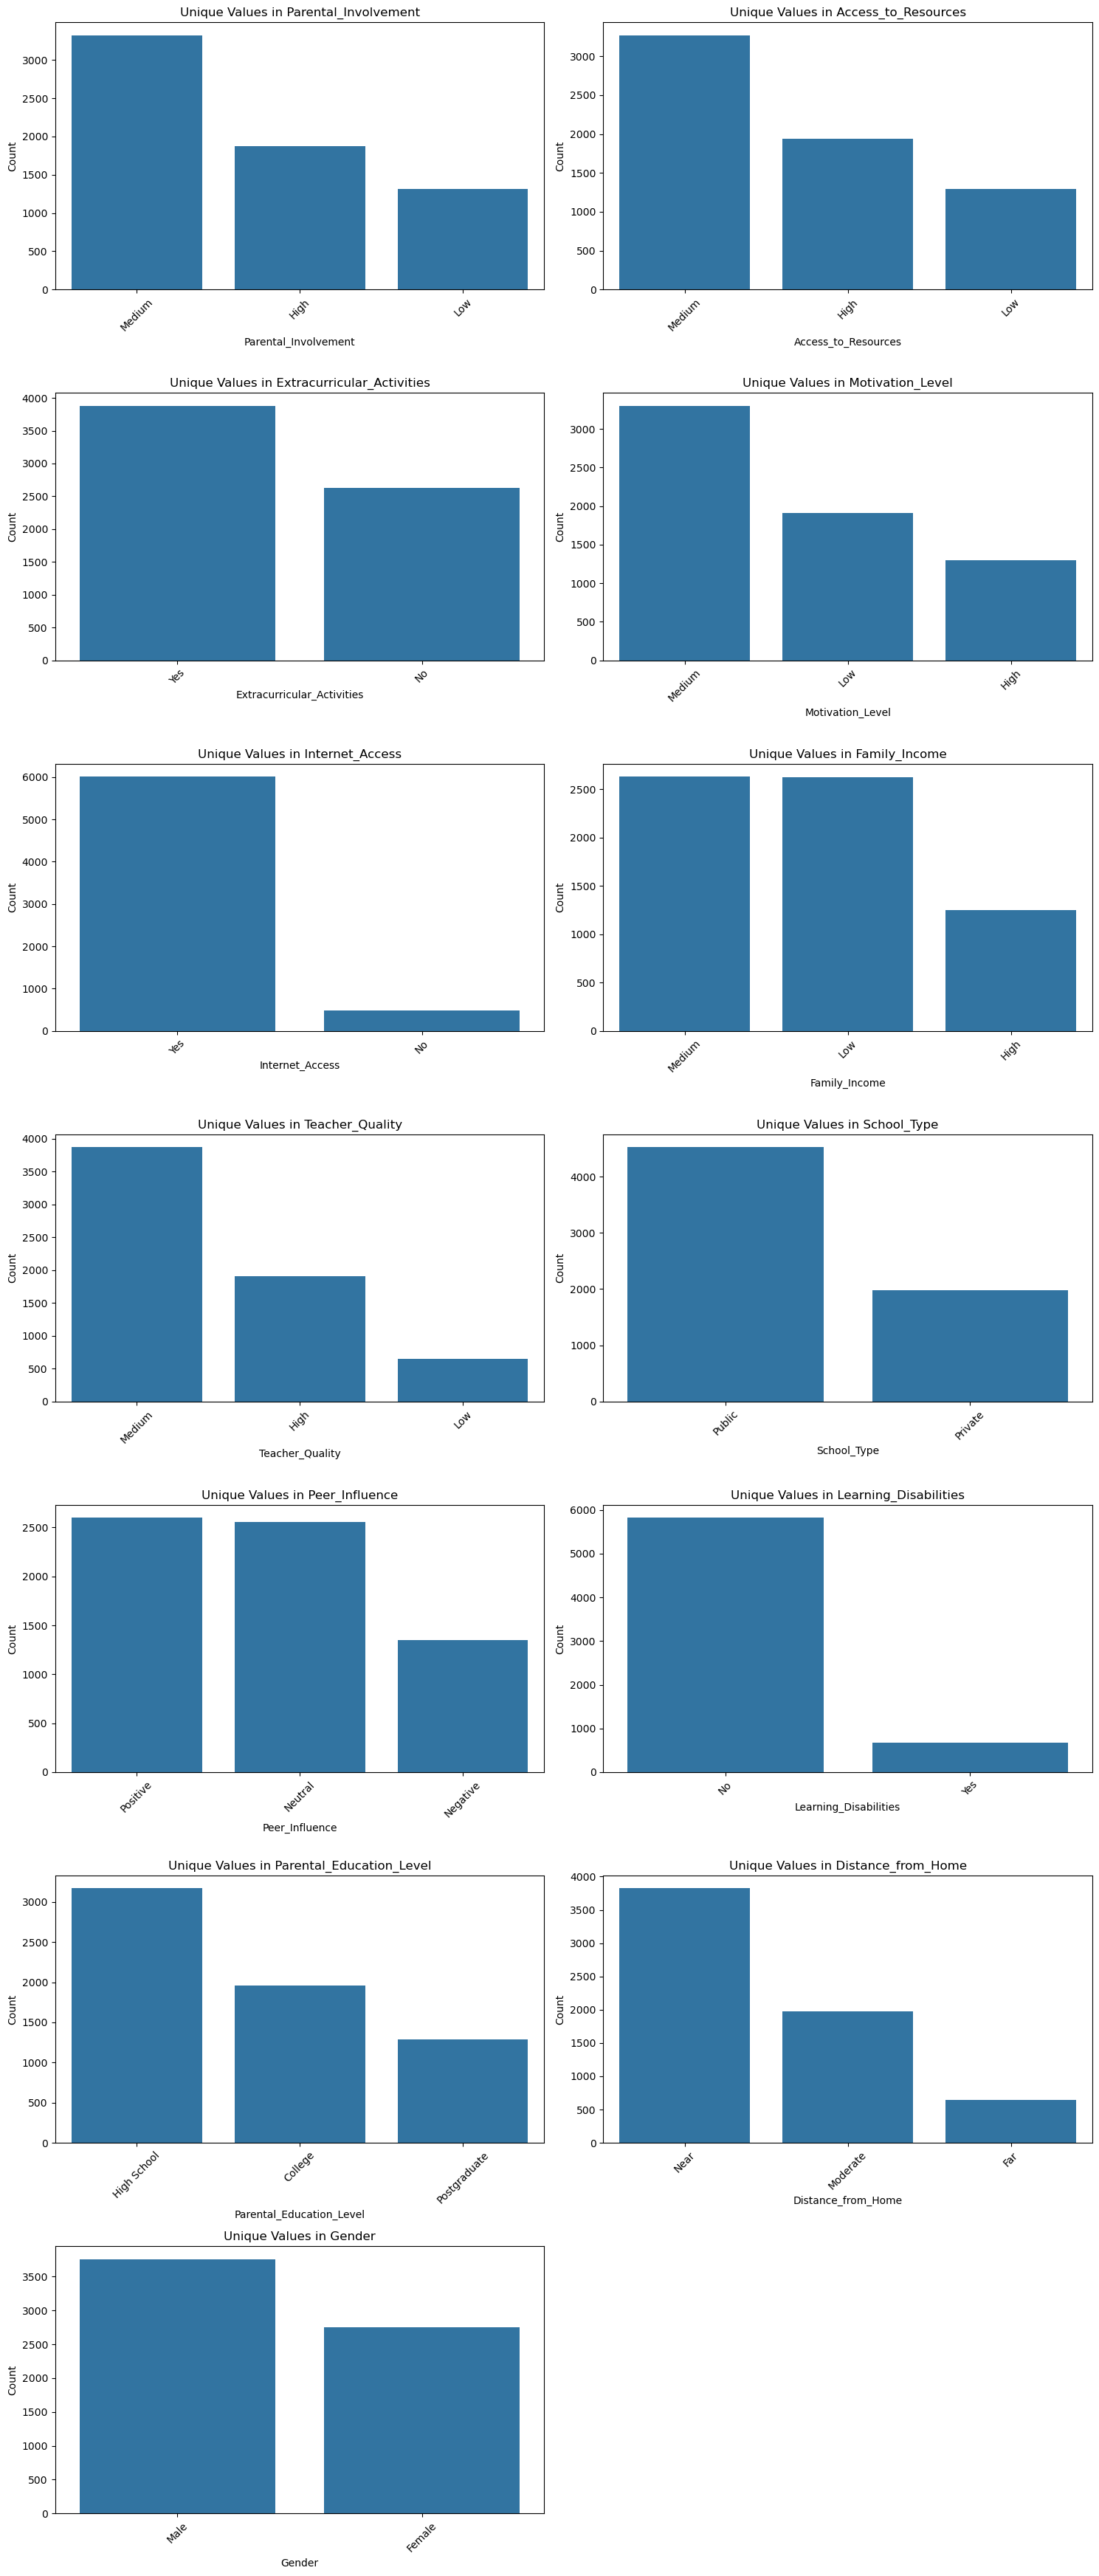

In [84]:
# Create a figure to hold the plots
num_columns = len(df_categorical_cols.columns)
plt.figure(figsize=(15, 5 * (num_columns // 2 + num_columns % 2)))  # Dynamic height based on number of columns

# Loop through each column and plot unique values
for i, column in enumerate(df_categorical_cols.columns):
    plt.subplot((num_columns // 2 + num_columns % 2), 2, i + 1)  # Create subplots
    unique_values = df_categorical_cols[column].value_counts()  # Count unique values
    sns.barplot(x=unique_values.index, y=unique_values.values)  # Create a bar plot
    plt.title(f'Unique Values in {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x labels for better readability

# Adjust layout
plt.tight_layout()
plt.show()

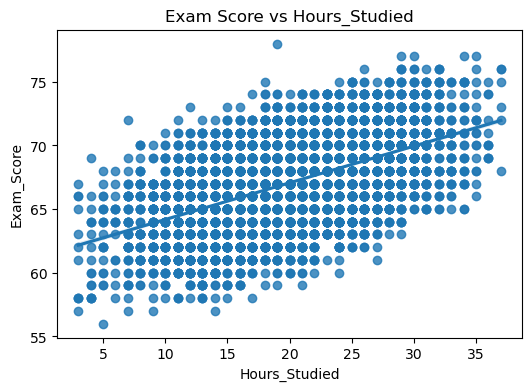

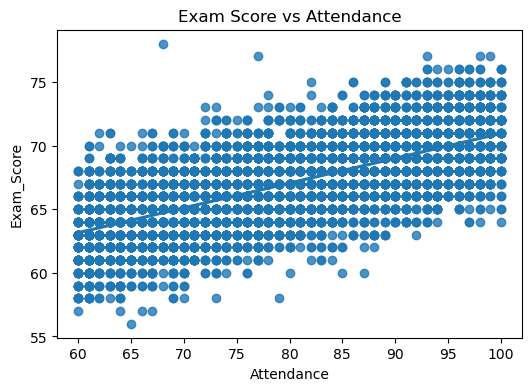

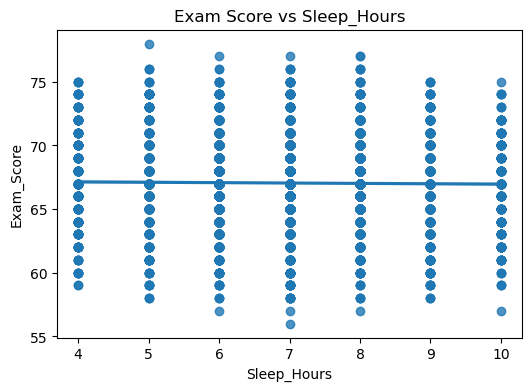

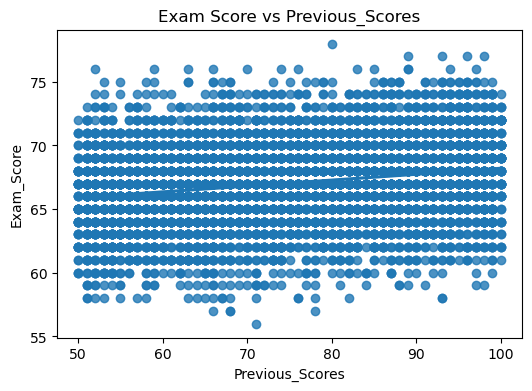

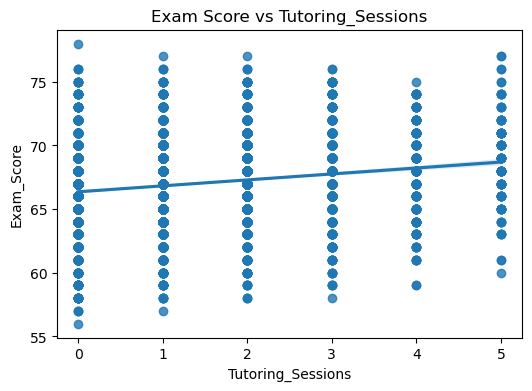

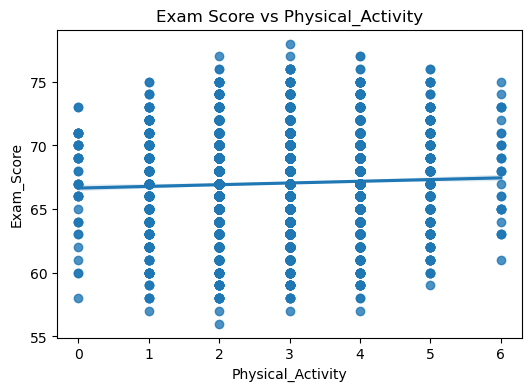

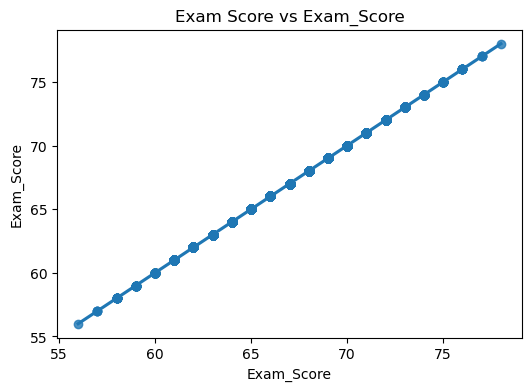

In [83]:
for var in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.regplot(x=var, y='Exam_Score', data=df_numerical_cols)
    plt.title(f'Exam Score vs {var}')
    plt.show()

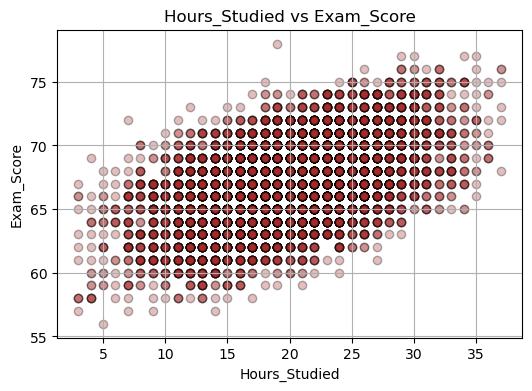

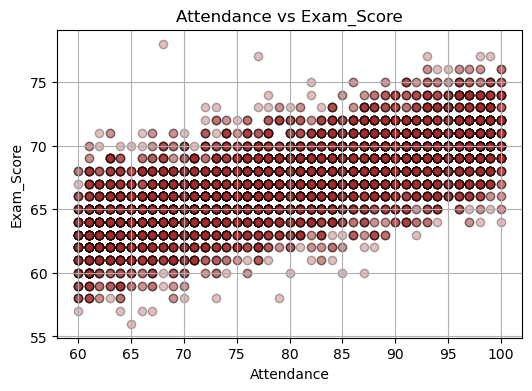

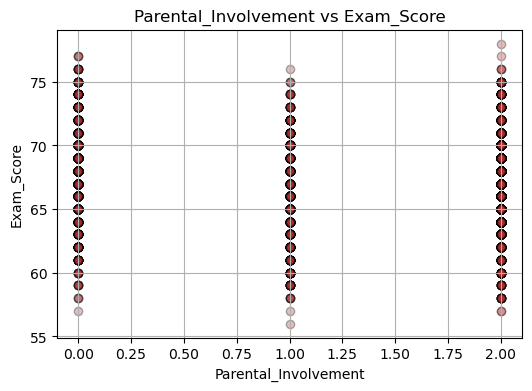

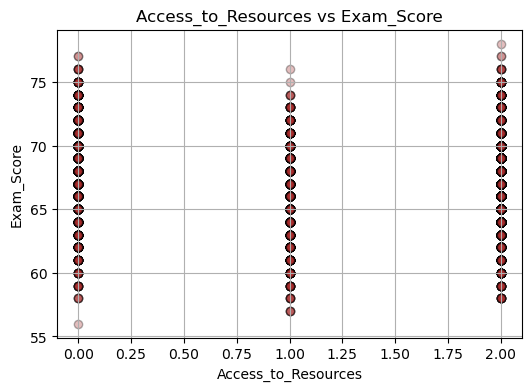

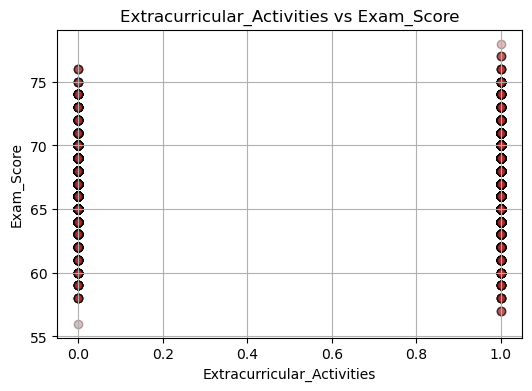

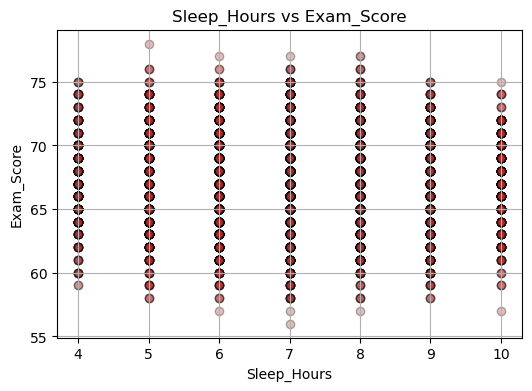

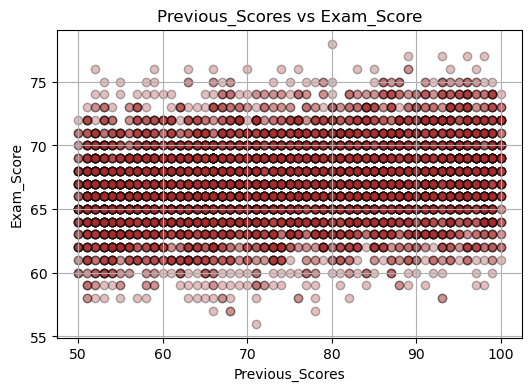

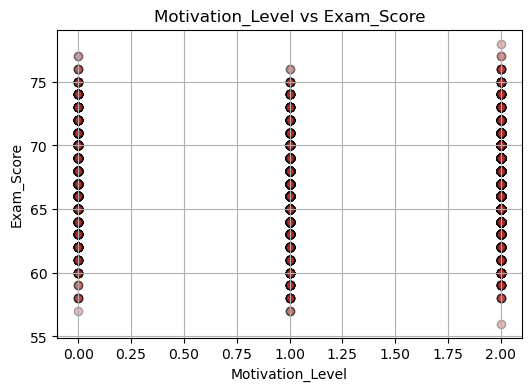

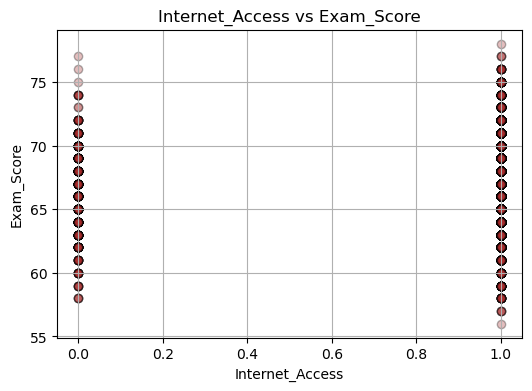

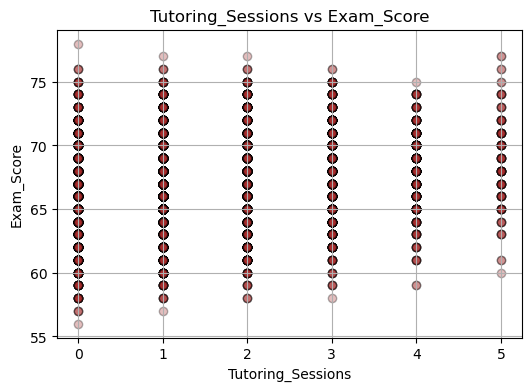

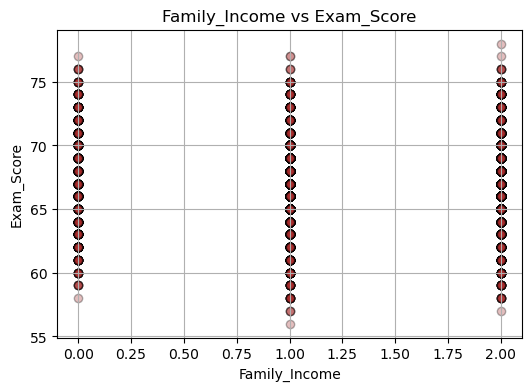

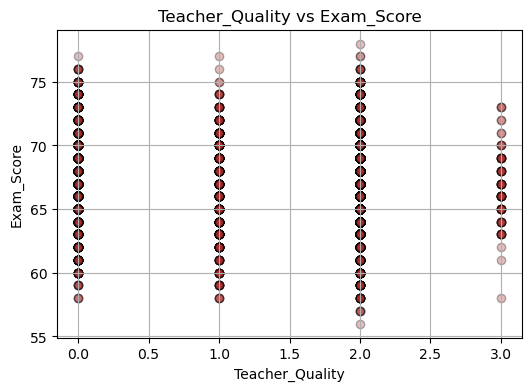

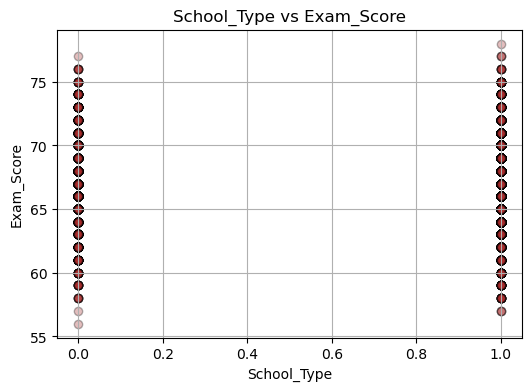

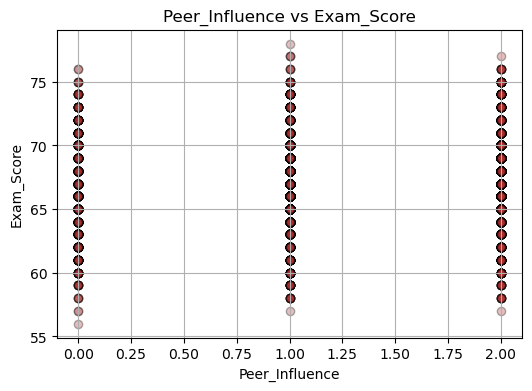

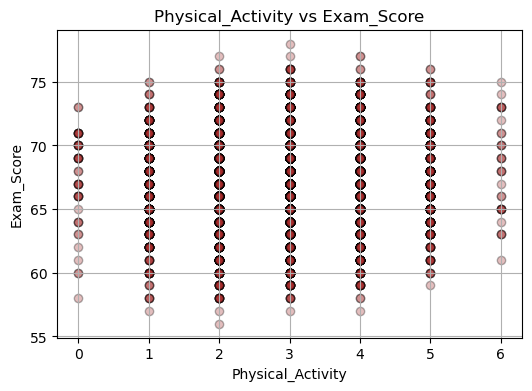

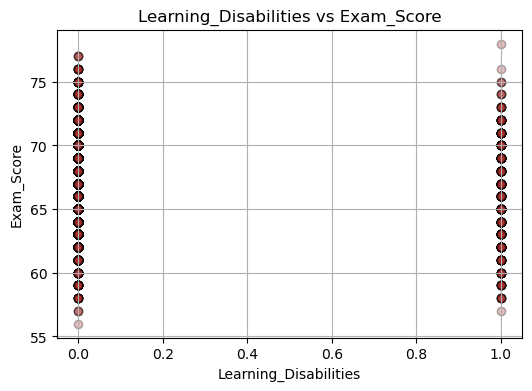

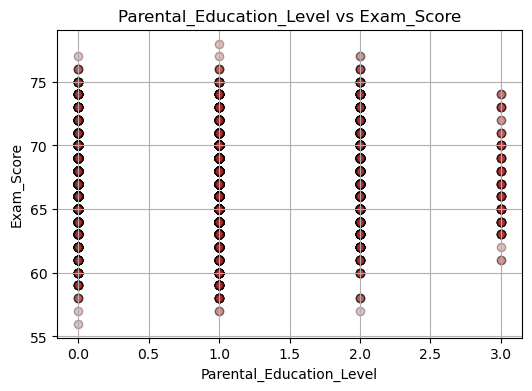

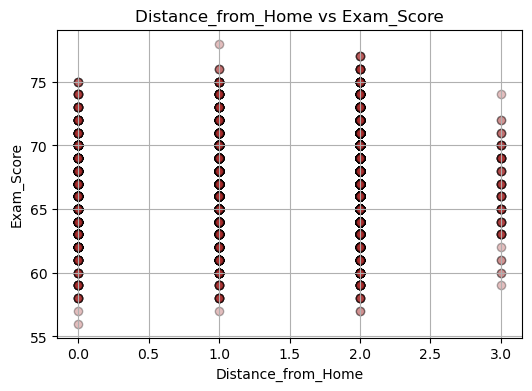

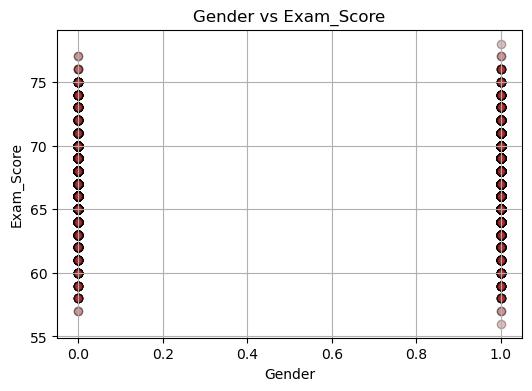

In [97]:
df_copy = df.copy()

for col in df_copy.select_dtypes(include='number').columns.drop(['Exam_Score']):
    plt.figure(figsize=(6, 4))
    plt.scatter(df[col], df['Exam_Score'], alpha=0.3, color='brown', edgecolors='black')
    plt.title(f'{col} vs Exam_Score')
    plt.xlabel(col)
    plt.ylabel('Exam_Score')
    plt.grid(True)
    plt.show()

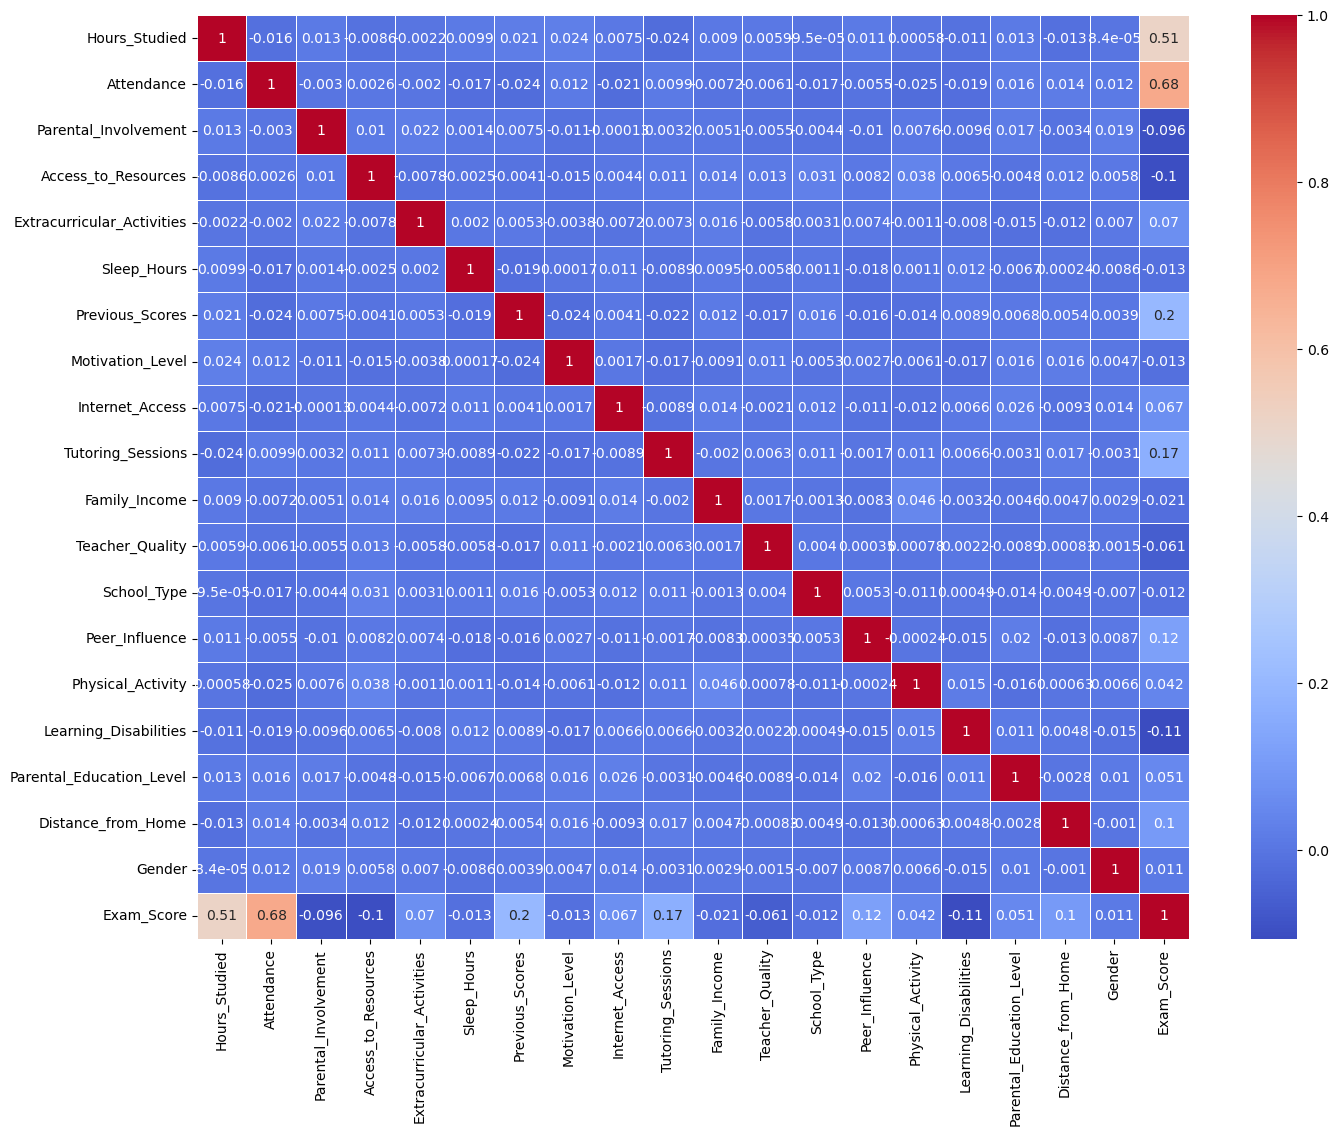

In [95]:
plt.figure(figsize=(16, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()